# Tic-Tac-Toe Q-Learning Agent Evaluation

In this notebook, we will load the trained Q-learning agent, evaluate its performance against a random player, and visualize the results.


In [23]:
# import necessary libraries
import sys
import os
import pickle
import matplotlib.pyplot as plt
import random
import numpy as np
import seaborn as sns

# use current working directory for Jupyter Notebook
current_dir = os.getcwd()

# add the parent directory and current directory to the system path
sys.path.append(os.path.dirname(current_dir))
sys.path.append(current_dir)

from models.tic_tac_toe import TicTacToe
from models.q_learning_agent import QLearningAgent

# load the trained agent
with open(os.path.join(current_dir, '..', 'models', 'trained_agent.pkl'), 'rb') as f:
    agent = pickle.load(f)

In [24]:

# initialize the Tic-Tac-Toe environment and results dictionary
env = TicTacToe()
results = {"wins": 0, "losses": 0, "draws": 0}
episodes = 1000
win_rates = []
average_rewards = []
cumulative_reward = 0

In [25]:
# evaluate the agent over the specified number of episodes
for episode in range(episodes):
    state = env.reset()
    done = False
    episode_reward = 0
    while not done:
        available_actions = env.available_actions()
        action = agent.choose_action(state, available_actions)
        state, reward, done = env.step(action)
        episode_reward += reward
        if done:
            if reward == 1:
                results["wins"] += 1
            elif reward == 2:
                results["losses"] += 1
            else:
                results["draws"] += 1
            break
        # random player's turn
        random_action = random.choice(env.available_actions())
        state, reward, done = env.step(random_action)
        episode_reward += reward
        if done:
            if reward == 1:
                results["wins"] += 1
            elif reward == 2:
                results["losses"] += 1
            else:
                results["draws"] += 1
    cumulative_reward += episode_reward
    average_rewards.append(cumulative_reward / (episode + 1))
    win_rate = results["wins"] / (episode + 1)
    win_rates.append(win_rate)

# print the evaluation results
print(results)

AttributeError: 'dict' object has no attribute 'choose_action'

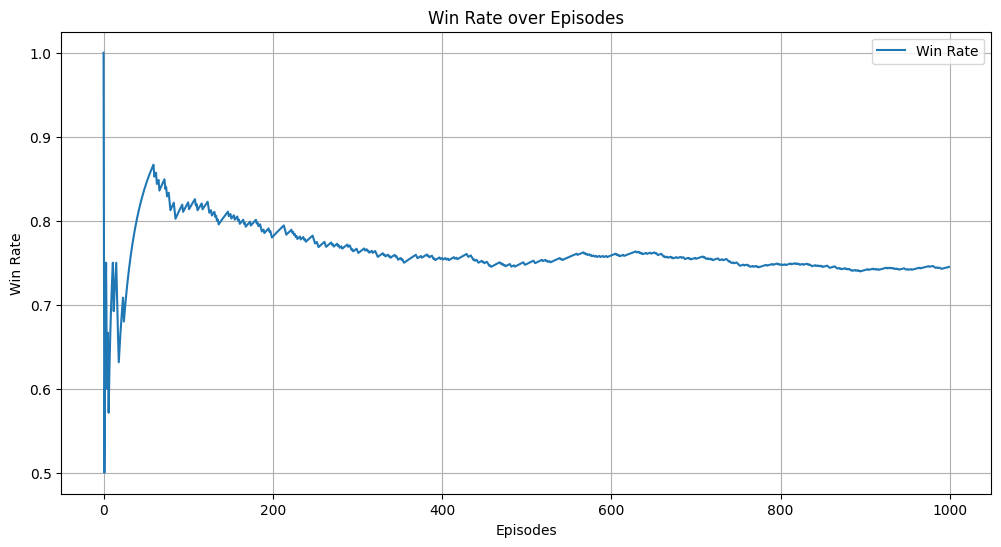

In [ ]:
episodes_range = range(episodes)

#win rate over episodes
plt.figure(figsize=(12, 6))
plt.plot(episodes_range, win_rates, label='Win Rate')
plt.xlabel('Episodes')
plt.ylabel('Win Rate')
plt.title('Win Rate over Episodes')
plt.legend()
plt.grid()
plt.show()


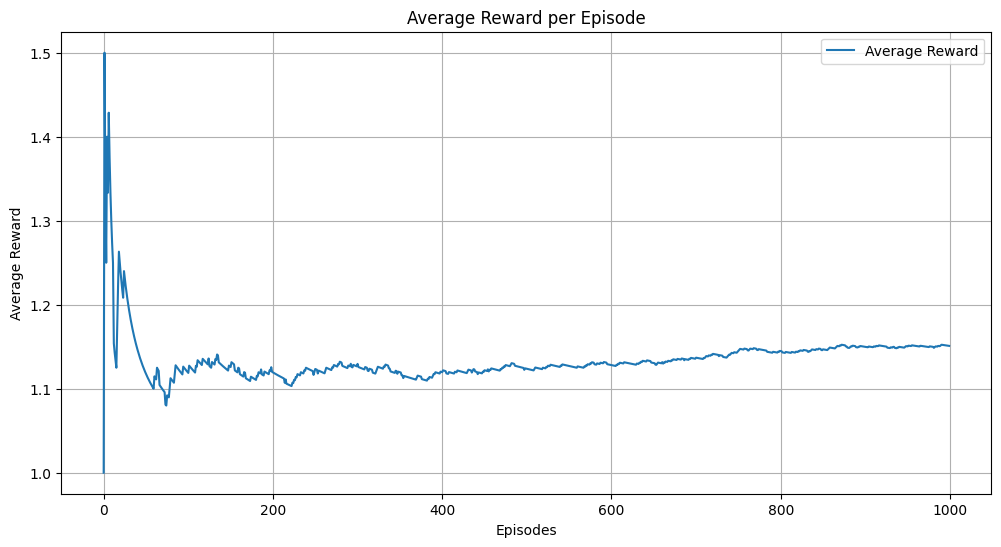

In [ ]:
#average reward per episode
plt.figure(figsize=(12, 6))
plt.plot(episodes_range, average_rewards, label='Average Reward')
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.title('Average Reward per Episode')
plt.legend()
plt.grid()
plt.show()


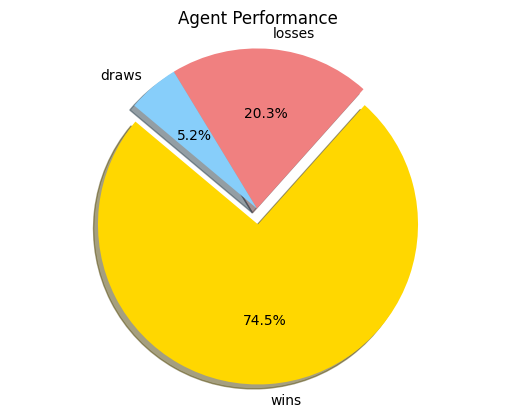

In [ ]:
# Prepare data for plotting
labels = results.keys()
sizes = results.values()
colors = ['gold', 'lightcoral', 'lightskyblue']
explode = (0.1, 0, 0)

# Create pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title('Agent Performance')
plt.show()
